In [55]:

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")
import pandas as pd
import seaborn as sns
import my_functions_v13 as my
import importlib
from matplotlib.ticker import PercentFormatter
from tqdm import tqdm
importlib.reload(my)

<module 'my_functions_v13' from '/Users/lucasumann/PycharmProjects/Masterarbeit/Notebooks/my_functions_v13.py'>

# First the results for training window 30%

In [56]:
time_windows = [7, 14, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360]

In [57]:
results_30 = {}

In [58]:
window_size_training = 0.3

In [59]:
number_factors = 3

In [60]:
full_coins_model = my.cond_auto_model(full_input = True, parallel_runs = 2, factor_dim=number_factors, model_name = "322 coins with intercept v13 training window "+str(window_size_training))
full_coins_model.test_percent = 1 - window_size_training
full_coins_model.initialize_X_Y()

In [61]:
# Read all results
for time in tqdm(time_windows):
    full_coins_model.update_future_Y_predictions(factor_averaging_days=time)
    full_coins_model.reset_X_Y()
    full_coins_model.calculate_predictive_r2()
    relevant_Rsquared_predictive_average = 1 - ((full_coins_model.masked_Y_pred_future_average[-1194:] - full_coins_model.masked_Y_test[-1194:])**2).sum().sum() / (full_coins_model.masked_Y_test[-1194:]**2).sum().sum()
    results_30[time] = relevant_Rsquared_predictive_average


100%|██████████| 25/25 [00:28<00:00,  1.14s/it]


# Now for training window 10%

In [62]:
time_windows = [7, 14, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165]

In [63]:
results_10 = {}

In [64]:
window_size_training = 0.1

In [65]:
number_factors = 3

In [66]:
full_coins_model = my.cond_auto_model(full_input = True, parallel_runs = 2, factor_dim=number_factors, model_name = "322 coins with intercept v13 training window "+str(window_size_training))
full_coins_model.test_percent = 1 - window_size_training
full_coins_model.initialize_X_Y()

In [67]:
# Read all results
for time in tqdm(time_windows[:-1]):
    full_coins_model.update_future_Y_predictions(factor_averaging_days=time)
    full_coins_model.reset_X_Y()
    full_coins_model.calculate_predictive_r2()
    relevant_Rsquared_predictive_average = 1 - ((full_coins_model.masked_Y_pred_future_average[-1194:] - full_coins_model.masked_Y_test[-1194:])**2).sum().sum() / (full_coins_model.masked_Y_test[-1194:]**2).sum().sum()
    results_10[time] = relevant_Rsquared_predictive_average


100%|██████████| 11/11 [00:11<00:00,  1.05s/it]


# Now for training window 15%

In [68]:
time_windows = [7, 14, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255]

In [69]:
results_15 = {}

In [70]:
window_size_training = 0.15

In [71]:
number_factors = 3

In [72]:
full_coins_model = my.cond_auto_model(full_input = True, parallel_runs = 2, factor_dim=number_factors, model_name = "322 coins with intercept v13 training window "+str(window_size_training))
full_coins_model.test_percent = 1 - window_size_training
full_coins_model.initialize_X_Y()

In [73]:
# Read all results
for time in tqdm(time_windows[:-1]):
    full_coins_model.update_future_Y_predictions(factor_averaging_days=time)
    full_coins_model.reset_X_Y()
    full_coins_model.calculate_predictive_r2()
    relevant_Rsquared_predictive_average = 1 - ((full_coins_model.masked_Y_pred_future_average[-1194:] - full_coins_model.masked_Y_test[-1194:])**2).sum().sum() / (full_coins_model.masked_Y_test[-1194:]**2).sum().sum()
    results_15[time] = relevant_Rsquared_predictive_average


100%|██████████| 17/17 [00:21<00:00,  1.27s/it]


In [74]:
results_df_30 = pd.DataFrame({"Days" : results_30.keys(), "Relevant Rsquared predictive 30": results_30.values()})

In [75]:
results_df_15 = pd.DataFrame({"Days" : results_15.keys(), "Relevant Rsquared predictive 15": results_15.values()})


In [76]:
results_df_10 = pd.DataFrame({"Days" : results_10.keys(), "Relevant Rsquared predictive 10": results_10.values()})

<AxesSubplot:xlabel='Days', ylabel='Relevant Rsquared predictive 30'>

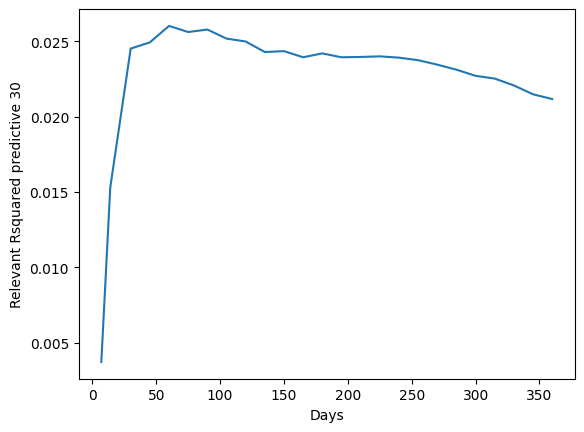

In [77]:
sns.lineplot(data = results_df_30, x = "Days", y = "Relevant Rsquared predictive 30")

<AxesSubplot:xlabel='Days', ylabel='Relevant Rsquared predictive 10'>

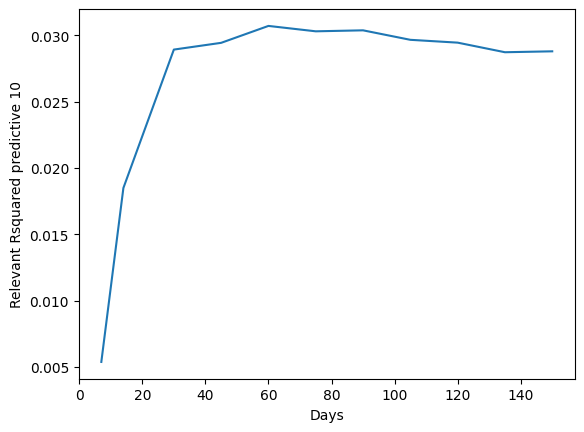

In [78]:
sns.lineplot(data = results_df_10, x = "Days", y = "Relevant Rsquared predictive 10")

<AxesSubplot:xlabel='Days', ylabel='Relevant Rsquared predictive 15'>

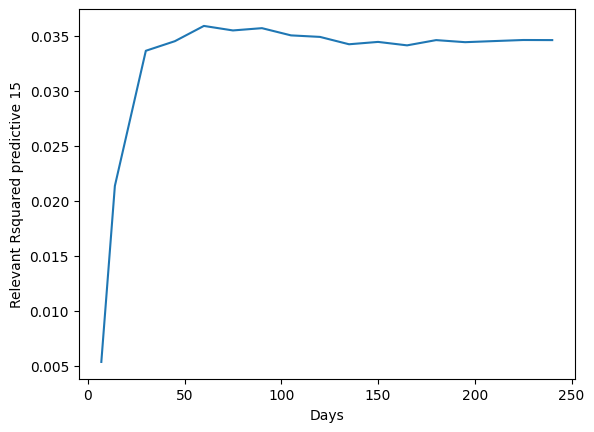

In [79]:
sns.lineplot(data = results_df_15, x = "Days", y = "Relevant Rsquared predictive 15")

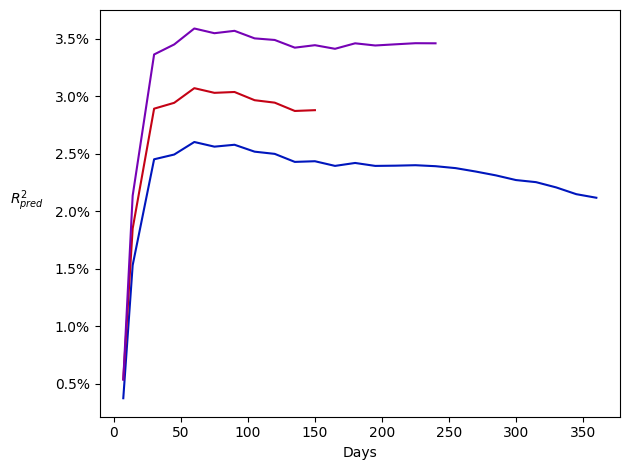

In [84]:
fig, ax = plt.subplots()

sns.lineplot(data = results_df_30, x = "Days", y = "Relevant Rsquared predictive 30", color = [0, 22/255, 189/255])
sns.lineplot(data = results_df_10, x = "Days", y = "Relevant Rsquared predictive 10", color = [196/255, 2/255, 21/255])
sns.lineplot(data = results_df_15, x = "Days", y = "Relevant Rsquared predictive 15", color = [118/255, 2/255, 181/255])


ax.set_xlabel("Days")
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals = 1))
ax.set_ylabel("$R^2_{pred}$", rotation = 0, labelpad = 20)
plt.tight_layout()
plt.savefig("../Plots/Impact risk premia days.png", transparent = True, dpi = 600)

In [83]:
results_df_10["Relevant Rsquared predictive 10"] - results_df_30["Relevant Rsquared predictive 30"] + results_df_15["Relevant Rsquared predictive 15"] - results_df_10["Relevant Rsquared predictive 10"]


0     0.001616
1     0.006048
2     0.009122
3     0.009580
4     0.009878
5     0.009872
6     0.009915
7     0.009859
8     0.009913
9     0.009941
10    0.010097
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
dtype: float64

In [82]:
results_df_15["Relevant Rsquared predictive 15"] - results_df_10["Relevant Rsquared predictive 10"]


0    -0.000040
1     0.002856
2     0.004717
3     0.005080
4     0.005194
5     0.005189
6     0.005322
7     0.005381
8     0.005455
9     0.005509
10    0.005654
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
dtype: float64